In [0]:
#Dogs vs. Cats


The training archive contains 25,000 images of dogs and cats.

Link for dataset: https://www.kaggle.com/c/dogs-vs-cats/data

In [0]:
import pandas as pd
import numpy as np


# Data

In [0]:
import zipfile


zip_files = ['test1', 'train']
# Will unzip the files so that you can see them..
for zip_file in zip_files:
    with zipfile.ZipFile("{}.zip".format(zip_file),"r") as z:
        z.extractall(".")
        print("{} unzipped".format(zip_file))


test1 unzipped
train unzipped


In [0]:
import os
IMAGE_FOLDER_PATH="train"
FILE_NAMES=os.listdir(IMAGE_FOLDER_PATH)
WIDTH=150
HEIGHT=150


In [0]:
targets=list()
full_paths=list()
for file_name in FILE_NAMES:
    target=file_name.split(".")[0]
    full_path=os.path.join(IMAGE_FOLDER_PATH, file_name)
    full_paths.append(full_path)
    targets.append(target)

dataset=pd.DataFrame()
dataset['image_path']=full_paths
dataset['target']=targets

In [0]:
dataset.head(10)

,image_path,target
0,train/dog.9153.jpg,dog
1,train/cat.11630.jpg,cat
2,train/cat.3765.jpg,cat
3,train/dog.5445.jpg,dog
4,train/cat.591.jpg,cat
5,train/cat.6686.jpg,cat
6,train/dog.3951.jpg,dog
7,train/cat.2384.jpg,cat
8,train/cat.6738.jpg,cat
9,train/cat.7037.jpg,cat


In [0]:
target_counts=dataset['target'].value_counts()
print("Number of dogs in the dataset:{}".format(target_counts['dog']))
print("Number of cats in the dataset:{}".format(target_counts['cat']))

Number of dogs in the dataset:12500
Number of cats in the dataset:12500


In [0]:
def show_model_history(modelHistory, model_name):
    history=pd.DataFrame()
    history["Train Loss"]=modelHistory.history['loss']
    history["Validatin Loss"]=modelHistory.history['val_loss']
    history["Train Accuracy"]=modelHistory.history['accuracy']
    history["Validatin Accuracy"]=modelHistory.history['val_accuracy']
  
    history.plot(figsize=(12,8))
    plt.title(" Convulutional Model {} Train and Validation Loss and Accuracy History".format(model_name))
    plt.show()

In [0]:
from keras import backend
backend.clear_session()

In [0]:
from keras import models
from keras import layers
model=models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation="relu", input_shape=(WIDTH, HEIGHT, 3)))
model.add(layers.Conv2D(32, (3,3), activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128, (3,3), activation="relu"))
model.add(layers.Conv2D(128, (3,3), activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 146, 146, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 146, 146, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 69, 69, 64)       

In [0]:
model.compile(loss="binary_crossentropy", 
             optimizer='rmsprop',
             metrics=["accuracy"])
print("[INFO]: model compiled...")

[INFO]: model compiled...


# Data Preprocessing

In [0]:
from sklearn.model_selection import train_test_split
dataset_train, dataset_test1=train_test_split(dataset,
                                                 test_size=0.3,
                                                 random_state=42)
dataset_valid, dataset_test=train_test_split(dataset_test1,
                                                 test_size=0.6,
                                                 random_state=42)


In [0]:
#we are using ImageDataGenerator to read images from directories
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen= ImageDataGenerator(rescale=1/255)
valid_datagen= ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_dataframe(
    dataset_train, x_col="image_path",
    y_col="target", target_size=(150,150), class_mode= "binary",  batch_size=20)
test_generator= test_datagen.flow_from_dataframe(
    dataset_test, x_col="image_path",
    y_col="target", target_size=(150,150),
    batch_size=20,
    class_mode='binary')
valid_generator= valid_datagen.flow_from_dataframe(
    dataset_valid, x_col="image_path",
    y_col="target", target_size=(150,150),
    batch_size=20,
    class_mode='binary')

Found 17500 validated image filenames belonging to 2 classes.
Found 4500 validated image filenames belonging to 2 classes.
Found 3000 validated image filenames belonging to 2 classes.


In [0]:
for data_batch, labels_batch in train_generator:
  print('data batch shape:', data_batch.shape)
  print('labels batch shape:', labels_batch.shape)
  break


data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


# Fitting The Model

In [0]:
history = model.fit_generator(train_generator,  epochs=50, validation_data= valid_generator)

Epoch 1/50
875/875 [==============================] - 62s 70ms/step - loss: 0.7946 - accuracy: 0.5763 - val_loss: 0.7748 - val_accuracy: 0.5653
Epoch 2/50
875/875 [==============================] - 60s 69ms/step - loss: 0.6014 - accuracy: 0.6836 - val_loss: 1.0306 - val_accuracy: 0.6103
Epoch 3/50
875/875 [==============================] - 61s 69ms/step - loss: 0.5156 - accuracy: 0.7584 - val_loss: 0.5143 - val_accuracy: 0.6777
Epoch 4/50
875/875 [==============================] - 61s 70ms/step - loss: 0.4351 - accuracy: 0.8034 - val_loss: 0.4149 - val_accuracy: 0.8000
Epoch 5/50
875/875 [==============================] - 60s 69ms/step - loss: 0.3873 - accuracy: 0.8326 - val_loss: 0.2732 - val_accuracy: 0.8203
Epoch 6/50
875/875 [==============================] - 60s 69ms/step - loss: 0.3451 - accuracy: 0.8533 - val_loss: 0.4658 - val_accuracy: 0.7833
Epoch 7/50
875/875 [==============================] - 60s 68ms/step - loss: 0.3182 - accuracy: 0.8715 - val_loss: 0.1454 - val_accuracy:

# Saving The Model

In [0]:
model.save('cats_vrs_dogs_v1')

# Plot

In [0]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

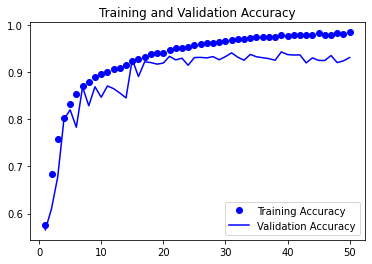

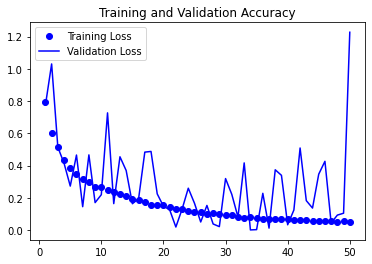

In [0]:
import matplotlib.pyplot as plt

acc= history.history['accuracy']
val_acc = history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()



Model starts to overfit after 18 Epochs, so we should stop at 18 epochs

# Updated Model

In [0]:
from keras import backend
backend.clear_session()

In [0]:
from keras import models
from keras import layers
model1=models.Sequential()
model1.add(layers.Conv2D(32, (3,3), activation="relu", input_shape=(WIDTH, HEIGHT, 3)))
model1.add(layers.Conv2D(32, (3,3), activation="relu"))
model1.add(layers.BatchNormalization())
model1.add(layers.MaxPooling2D((2,2)))
model1.add(layers.Dropout(0.25))

model1.add(layers.Conv2D(64, (3,3), activation="relu"))
model1.add(layers.Conv2D(64, (3,3), activation="relu"))
model1.add(layers.BatchNormalization())
model1.add(layers.MaxPooling2D(2,2))
model1.add(layers.Dropout(0.25))

model1.add(layers.Conv2D(128, (3,3), activation="relu"))
model1.add(layers.Conv2D(128, (3,3), activation="relu"))
model1.add(layers.BatchNormalization())
model1.add(layers.MaxPooling2D((2,2)))
model1.add(layers.Dropout(0.25))

model1.add(layers.Conv2D(64, (3,3), activation="relu"))
model1.add(layers.Conv2D(64, (3,3), activation="relu"))
model1.add(layers.BatchNormalization())
model1.add(layers.MaxPooling2D((2,2)))
model1.add(layers.Dropout(0.25))
model1.add(layers.Flatten())
model1.add(layers.Dense(512, activation="relu"))
model1.add(layers.Dropout(0.5))
model1.add(layers.Dense(1, activation="sigmoid"))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 146, 146, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 146, 146, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 69, 69, 64)       

In [0]:
model1.compile(loss="binary_crossentropy", 
             optimizer='rmsprop',
             metrics=["accuracy"])
print("[INFO]: model compiled...")

[INFO]: model compiled...


In [0]:
history1 = model1.fit_generator(train_generator,  epochs=18, validation_data= valid_generator)

Epoch 1/18
875/875 [==============================] - 62s 71ms/step - loss: 0.7707 - accuracy: 0.5958 - val_loss: 0.8005 - val_accuracy: 0.5290
Epoch 2/18
875/875 [==============================] - 62s 71ms/step - loss: 0.5762 - accuracy: 0.7212 - val_loss: 0.6083 - val_accuracy: 0.6457
Epoch 3/18
875/875 [==============================] - 61s 70ms/step - loss: 0.4708 - accuracy: 0.7847 - val_loss: 0.3283 - val_accuracy: 0.8293
Epoch 4/18
875/875 [==============================] - 61s 70ms/step - loss: 0.3882 - accuracy: 0.8378 - val_loss: 0.9391 - val_accuracy: 0.7497
Epoch 5/18
875/875 [==============================] - 61s 70ms/step - loss: 0.3385 - accuracy: 0.8626 - val_loss: 0.3305 - val_accuracy: 0.8690
Epoch 6/18
875/875 [==============================] - 60s 69ms/step - loss: 0.2946 - accuracy: 0.8843 - val_loss: 0.5449 - val_accuracy: 0.8573
Epoch 7/18
875/875 [==============================] - 61s 69ms/step - loss: 0.2687 - accuracy: 0.8906 - val_loss: 0.1951 - val_accuracy:

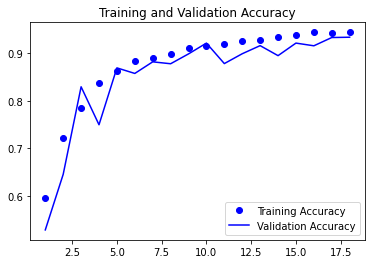

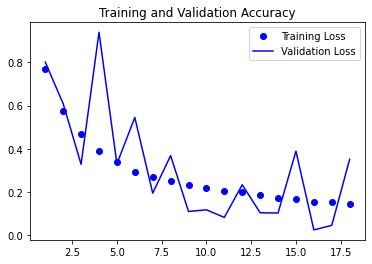

In [0]:
import matplotlib.pyplot as plt

acc= history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss=history1.history['loss']
val_loss=history1.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()



# Evaluate Model

## Model 1

Model with 50 Epochs

In [0]:
model.evaluate(test_generator)

225/225 [==============================] - 13s 57ms/step


[0.33670392632484436, 0.9308888912200928]

## Model 2 (Updated Model)

Model with 18 Epochs

In [0]:
model1.evaluate(test_generator)

225/225 [==============================] - 13s 58ms/step


[0.09589871019124985, 0.9248889088630676]

# Data Augmentation

It will generate more training data from existing training samples, by augmenting the sample via a number of random transform

In [0]:
datagen = ImageDataGenerator(rotation_range =40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

## Model 3

In [0]:
from keras import backend
backend.clear_session()

In [0]:
from keras import models
from keras import layers
model2=models.Sequential()
model2.add(layers.Conv2D(32, (3,3), activation="relu", input_shape=(WIDTH, HEIGHT, 3)))
model2.add(layers.Conv2D(32, (3,3), activation="relu"))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D((2,2)))
model2.add(layers.Dropout(0.25))

model2.add(layers.Conv2D(64, (3,3), activation="relu"))
model2.add(layers.Conv2D(64, (3,3), activation="relu"))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D(2,2))
model2.add(layers.Dropout(0.25))

model2.add(layers.Conv2D(128, (3,3), activation="relu"))
model2.add(layers.Conv2D(128, (3,3), activation="relu"))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D((2,2)))
model2.add(layers.Dropout(0.25))

model2.add(layers.Conv2D(64, (3,3), activation="relu"))
model2.add(layers.Conv2D(64, (3,3), activation="relu"))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D((2,2)))
model2.add(layers.Dropout(0.25))
model2.add(layers.Flatten())
model2.add(layers.Dense(512, activation="relu"))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(1, activation="sigmoid"))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 146, 146, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 146, 146, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 69, 69, 64)       

In [0]:
model2.compile(loss="binary_crossentropy", 
             optimizer='rmsprop',
             metrics=["accuracy"])
print("[INFO]: model compiled...")

[INFO]: model compiled...


## Training The Model Using Data-augmentation Generator

In [0]:
#we are using ImageDataGenerator to read images from directories
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255, rotation_range =40, 
                                   width_shift_range=0.2, height_shift_range=0.2, 
                                   shear_range=0.2, zoom_range=0.2, 
                                   horizontal_flip=True)
test_datagen= ImageDataGenerator(rescale=1/255)
valid_datagen= ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_dataframe(
    dataset_train, x_col="image_path",
    y_col="target", target_size=(150,150), class_mode= "binary",  batch_size=32)
test_generator= test_datagen.flow_from_dataframe(
    dataset_test, x_col="image_path",
    y_col="target", target_size=(150,150),
    batch_size=32,
    class_mode='binary')
valid_generator= valid_datagen.flow_from_dataframe(
    dataset_valid, x_col="image_path",
    y_col="target", target_size=(150,150),
    batch_size=32,
    class_mode='binary')

Found 17500 validated image filenames belonging to 2 classes.
Found 4500 validated image filenames belonging to 2 classes.
Found 3000 validated image filenames belonging to 2 classes.


In [0]:
history2 = model2.fit_generator(train_generator,  epochs=50, validation_data= valid_generator)

Epoch 1/50
547/547 [==============================] - 142s 260ms/step - loss: 0.8217 - accuracy: 0.5571 - val_loss: 0.8527 - val_accuracy: 0.5367
Epoch 2/50
547/547 [==============================] - 139s 253ms/step - loss: 0.6620 - accuracy: 0.6247 - val_loss: 0.4736 - val_accuracy: 0.6527
Epoch 3/50
547/547 [==============================] - 138s 253ms/step - loss: 0.6233 - accuracy: 0.6697 - val_loss: 0.6429 - val_accuracy: 0.6810
Epoch 4/50
547/547 [==============================] - 137s 250ms/step - loss: 0.5761 - accuracy: 0.7107 - val_loss: 0.4796 - val_accuracy: 0.5873
Epoch 5/50
547/547 [==============================] - 135s 248ms/step - loss: 0.5321 - accuracy: 0.7393 - val_loss: 0.6107 - val_accuracy: 0.7163
Epoch 6/50
547/547 [==============================] - 134s 246ms/step - loss: 0.5057 - accuracy: 0.7606 - val_loss: 3.4669 - val_accuracy: 0.5550
Epoch 7/50
547/547 [==============================] - 137s 251ms/step - loss: 0.4756 - accuracy: 0.7780 - val_loss: 0.7165 -

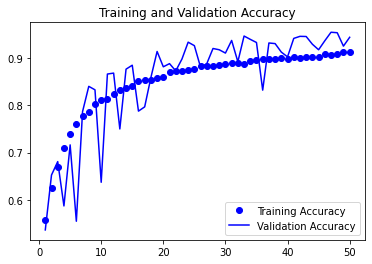

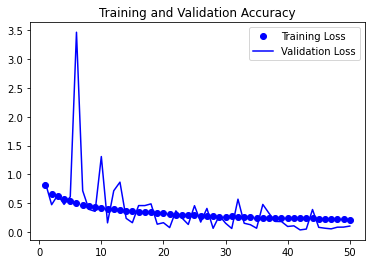

In [0]:
acc= history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss=history2.history['loss']
val_loss=history2.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

## Evaluate Model

In [0]:
model2.evaluate(test_generator)

141/141 [==============================] - 13s 89ms/step


[0.6582826375961304, 0.7791110873222351]

141/141 [==============================] - 13s 91ms/step


[0.1301768720149994, 0.9382222294807434]